el polinomio es de grado 5 y se divide 20.0 veces en la función
Las raices de la primera aproximación del polinomio se encuentran en
[0.         0.00477458 0.01727458 0.03272542 0.04522542 0.05      ]
[2.57467100e-08 5.91541979e-08 7.18206057e-08 5.81203595e-08
 2.50132256e-08]


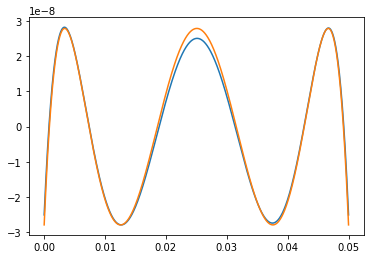

In [3]:
#Problema 2 en una sola subdivisión !

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sci
import math

def f(x):
    return np.sin(2*np.pi*np.cos(np.pi*x))

def pn(x,c):
    k=0
    for i in range(len(c)):
        if i==0:
            k+= c[i]
        if i>0:
            k+= c[i]*x**i
    return k

def findzero(err , x0 , x1, f, pn, c):
    
    f_a=err(x0,f,pn,c)
    f_b=err(x1,f,pn,c)
    
    if math.copysign(1,f_a)==math.copysign(1,f_b):
        print('las funciones en los puntos indicados tienen el mismo signo')
        print('f_a')
        print(f_a)
        print('f_b')
        print(f_b)
        return(0)
        
    x = x0-f_a*((x1-x0)/(f_b-f_a))
    
    f_z = err(x,f,pn,c)
    
    while f_z>2**(-52):
        
        if math.copysign(1,f_z)==math.copysign(1,f_a):
            x0=x
            f_a=f_z
        else:
            x1=x
            f_b=f_z
        
        x = x0-f_a*((x1-x0)/(f_b-f_a))
        
        f_z = err(x,f,pn,c)
    
    return(x)

def err(x,f,pn,c):
    return(f(x)-pn(x,c))
#-----------------------------------------------------------------------------

n_p=5 #2, 4, 5, 10, 20, 50, 100

n_t=100  #número de nodos totales en la función
d=n_t/n_p   #Cuantas veces va a dividirse el rango
        # El grado del polinomio es 

xa=0     #Rango
xb=1/d     #Rango

#n_p=int(n_t/d)    #Número de Intérvalos, n_p+1 es el grado del polinomio

print('el polinomio es de grado',n_p,'y se divide',d,'veces en la función')

Oh=1000
n_e=Oh*n_p    # puntos de evaluación

A=np.zeros((n_p+1,n_p+1))
b=np.zeros(n_p+1)

X=np.zeros(n_e+1)    #La posición de todos los nodos
for i in range(n_e+1):
    X[i]=xa+(xb-xa)*i/n_e
    
x_p=np.zeros(n_p+1)    #Posición de las raícez del polinomio
for i in range(n_p+1):
    
    #DISTRIBUCION DE CHEBYSHEV
    
    x_p[i]=xa+(xb-xa)*1/2*(1-np.cos(i*np.pi/(n_p)))
    
    #DISTRIBUCION EQUIDISTANTE
    
    #x_p[i]=xa+(xb-xa)*i/n_p
    
print('Las raices de la primera aproximación del polinomio se encuentran en')
print(x_p)
    
# La primera aproximación ----------------------------------------------------------------------------------------------

for i in range(n_p+1):
    t=x_p[i]
    b[i]=f(t)
    for j in range(n_p+1):
        if j==0:
            A[i,j]=1         
        if j>0:
            A[i,j]=t**j

c=sci.solve(A,b)

# Busqueda de los errores máximos locales

E=np.zeros(n_p)
for i in range(1,n_p+1):
    ta=x_p[i-1]
    tb=x_p[i]
    for k in range(Oh):
        u=ta+(tb-ta)*k/Oh
        p_e=pn(u,c)
        f_e=f(u)
        error=f_e-p_e
        if np.abs(error)>np.abs(E[i-1]):
            E[i-1]=np.abs(error)    #original: E[i-1]=error

E_min=np.min(E)

print(E)

#Búsqueda de nuevas raíces x_E

x_E=np.zeros(n_p+2)
x_E[0]=xa
x_E[n_p+1]=xb

for i in range(1,n_p+1):
    x_E[i]=x_p[i-1]+(x_p[i]-x_p[i-1])/2


# Optimización del polinomio! -----------------------------------------------------------------------
# Se prefiere hacer una busqueda manual hasta encontrar el resultado más óptimo. 
# Por lo general con un loop en rango 1 y 2 se alcanza la optimización para este ejercicio.

for l in range(2):
    
    A2=np.zeros((n_p+2,n_p+2))
    b2=np.zeros(n_p+2)
    
    for i in range(n_p+2):
        t=x_E[i]
        b2[i]=f(t)+np.abs(E_min)*(-1)**(i)
        for j in range(n_p+2):
            A2[i,j]=t**j
            if j==0:
                A2[i,j]=1
                
    c2=sci.solve(A2,b2)
    
    G2=np.zeros(n_e+1)
    for i in range(n_e+1):
        G2[i]=(f(X[i])-pn(X[i],c2))
    plt.figure(3)
    plt.plot(X,G2)
    
    
    
    #Busqueda de x_pE----
    
    x_pE=np.zeros(n_p+1)
    
    for i in range(1,n_p+2):
        ta=x_E[i-1]
        tb=x_E[i]
        x_pE[i-1]=findzero(err , ta , tb, f, pn, c2)
        
    
    x_E2=np.zeros(n_p+2)
    x_E2[0]=xa
    x_E2[n_p+1]=xb
    
    E2=np.zeros(n_p+1)
    for i in range(1,n_p+1):
        ta=x_pE[i-1]
        tb=x_pE[i]
        for k in range(Oh):
            u=ta+(tb-ta)*k/Oh
            p_e=pn(u,c2)
            f_e=f(u)
            error=f_e-p_e
            if np.abs(error)>np.abs(E2[i]):
                E2[i]=error
                x_E2[i]=u
    x_E=x_E2
    E_min=np.min(E2) 
        

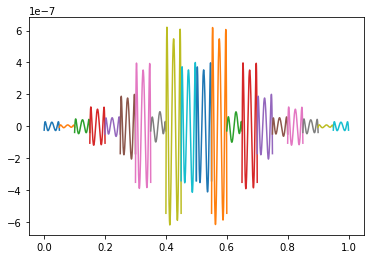

In [4]:
#Problema 2 con múltiples subdivisiones !

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sci
import math
import random

def f(x):
    return np.sin(2*np.pi*np.cos(np.pi*x))

def pn(x,c):
    k=0
    for i in range(len(c)):
        if i==0:
            k+= c[i]
        if i>0:
            k+= c[i]*x**i
    return k

def findzero(err , x0 , x1, f, pn, c):
    
    f_a=err(x0,f,pn,c)
    f_b=err(x1,f,pn,c)
    
    if math.copysign(1,f_a)==math.copysign(1,f_b):
        print('las funciones en los puntos indicados tienen el mismo signo')
        print('f_a')
        print(f_a)
        print('f_b')
        print(f_b)
        return(0)
        
    x = x0-f_a*((x1-x0)/(f_b-f_a))
    
    f_z = err(x,f,pn,c)
    
    while f_z>2**(-52):
        
        if math.copysign(1,f_z)==math.copysign(1,f_a):
            x0=x
            f_a=f_z
        else:
            x1=x
            f_b=f_z
        
        x = x0-f_a*((x1-x0)/(f_b-f_a))
        
        f_z = err(x,f,pn,c)
    
    return(x)

def err(x,f,pn,c):
    return(f(x)-pn(x,c))
#-----------------------------------------------------------------------------

n_p=5 # grado del polinomio

n_t=100  #número de nodos totales en la función
d=int(n_t/n_p)   #Cuantas veces va a dividirse el rango

    
for m in range(d):
    #print(m)
    if m == 0:
        xa=0
        xb=1/d
    if m>0:
        xa=xb
        xb+=1/d

    Oh=1000
    n_e=Oh*n_p    # puntos de evaluación

    A=np.zeros((n_p+1,n_p+1))
    b=np.zeros(n_p+1)

    X=np.zeros(n_e+1)    #La posición de todos los nodos
    for i in range(n_e+1):
        X[i]=xa+(xb-xa)*i/n_e
    
    x_p=np.zeros(n_p+1)    #Posición de las raícez del polinomio
    for i in range(n_p+1):
        
        #DISTRIBUCION DE CHEBYSHEV
        
        x_p[i]=xa+(xb-xa)*1/2*(1-np.cos(i*np.pi/(n_p)))
        
        #DISTRIBUCION EQUIDISTANTE
        
        #x_p[i]=xa+(xb-xa)*i/n_p
    
    
    # La primera aproximación ----------------------------------------------------------------------------------------------

    for i in range(n_p+1):
        t=x_p[i]
        b[i]=f(t)
        for j in range(n_p+1):
            if j==0:
                A[i,j]=1         
            if j>0:
                A[i,j]=t**j

            
    c=sci.solve(A,b)


    # Busqueda de los peaks de error
    E=np.zeros(n_p)
    for i in range(1,n_p+1):
        ta=x_p[i-1]
        tb=x_p[i]
        for k in range(Oh):
            u=ta+(tb-ta)*k/Oh
            p_e=pn(u,c)
            f_e=f(u)
            error=f_e-p_e
            if np.abs(error)>np.abs(E[i-1]):
                E[i-1]=np.abs(error)

    E_min=np.min(E)

    #Búsqueda de nuevas raíces x_E

    x_E=np.zeros(n_p+2)
    x_E[0]=xa
    x_E[n_p+1]=xb

    for i in range(1,n_p+1):
        x_E[i]=x_p[i-1]+(x_p[i]-x_p[i-1])/2
        

# Optimización del polinomio! -----------------------------------------------------------------------
# Se prefiere hacer una busqueda manual hasta encontrar el resultado más óptimo. 
    
    m=1
    for l in range(m):
    
        A2=np.zeros((n_p+2,n_p+2))
        b2=np.zeros(n_p+2)
    
        for i in range(n_p+2):
            t=x_E[i]
            b2[i]=f(t)+np.abs(E_min)*(-1)**(i)
            for j in range(n_p+2):
                A2[i,j]=t**j
                if j==0:
                    A2[i,j]=1
                
        c2=sci.solve(A2,b2)
        
        if l == (m-1):
            G2=np.zeros(n_e+1)
            for i in range(n_e+1):
                G2[i]=(f(X[i])-pn(X[i],c2))
            plt.figure(3)
            plt.plot(X,G2)
    
        #Busqueda de x_pE----
    
        x_pE=np.zeros(n_p+1)
    
        for i in range(1,n_p+2):
            ta=x_E[i-1]
            tb=x_E[i]
            x_pE[i-1]=findzero(err , ta , tb, f, pn, c2)
        
    
        x_E2=np.zeros(n_p+2)
        x_E2[0]=xa
        x_E2[n_p+1]=xb
    
        E2=np.zeros(n_p+1)
        for i in range(1,n_p+1):
            ta=x_pE[i-1]
            tb=x_pE[i]
            for k in range(Oh):
                u=ta+(tb-ta)*k/Oh
                p_e=pn(u,c2)
                f_e=f(u)
                error=f_e-p_e
                if np.abs(error)>np.abs(E2[i]):
                    E2[i]=error
                    x_E2[i]=u
        x_E=x_E2
        E_min=np.min(E2)
    